# Mini Project

## EDA  and Statistical Analysis for a Sport comany to predict the best Players for Team.

In [2]:
# import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

----------------------

1. You were recently hired as a business analyst in a top sports company. 
The senior management team has asked you to come up with metrics with which they can gauge which team will win the upcoming La Liga cup (Football tournament). The given data set contains information on all the teams that have so far participated in all the past tournaments. It has data about how many goals each team scored, conceded; how many times they came within the first 6 positions, how many seasons they have qualified, their best position in the past, etc. 

You are required to do the following:

Before doing any analysis it would be a good idea to check for any hypens or other symbols the data set and make appropriate replacements to make sure you can perform arithmetic operations on the data.

In [41]:
laliga = pd.read_csv('Laliga.csv')
headers = laliga.loc[0]
laliga.columns = headers
laliga.drop(laliga.head(1).index,inplace = True)
laliga.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
5,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


#### Refining the Datset:

* `Debut          : Considering First year[1931 will be considered from 1931-32]`
* `Since/LastApp  : Considering Last year[1932 will be considered from 1931-32]`
* `No Null Values in the Dataset but one Record where GamesPlayed is '-' : Removing the same`

In [42]:
def debut_splitter(x):
    return x.split('-')[0]

def last_appeared_splitter(x):
    return x[:2:]+x[-2::]

laliga['Debut'] = laliga['Debut'].apply(debut_splitter).astype('int64')

laliga['Since/LastApp'] = laliga['Since/LastApp'].apply(last_appeared_splitter).astype('int64')

laliga.drop(laliga[laliga['GamesPlayed']=='-'].index,inplace=True)

* 1.	Which are the teams which started playing between 1930-1980?

In [48]:
# Teams which made Debut in year range : 1930-1980
print('Teams : ')
print(laliga[(laliga['Debut'] >= 1930) & (laliga['Debut'] <= 1980)][['Team','Debut']].sort_values('Debut'))

Teams : 
0                  Team  Debut
29               Alaves   1930
4              Valencia   1931
10           Real Betis   1932
18               Oviedo   1933
6               Sevilla   1934
26             Hercules   1935
16              Osasuna   1935
9              Zaragoza   1939
12           Celta Vigo   1939
28               Murcia   1940
22              Granada   1941
11  Deportivo La Coruna   1941
35            Castellon   1941
32             Sabadell   1943
15       Sporting Gijon   1944
50             Alcoyano   1945
47            Gimnastic   1947
13           Valladolid   1948
17               Malaga   1949
55               Lleida   1950
20           Las Palmas   1951
59      Atletico Tetuan   1951
51                 Jaen   1953
60     Cultural Leonesa   1955
58               Condal   1956
24                Elche   1959
19             Mallorca   1960
27             Tenerife   1961
38              Cordoba   1962
30              Levante   1963
42           Pontevedra   1963

* 2.	Which are the top 5 teams in terms of points?

In [52]:
#Top 5 Teams on basis of Points 
laliga.sort_values('Points',ascending = False)[['Team','Points']].head(5)

,Team,Points
21,Villarreal,970
46,Real Burgos,96
47,Gimnastic,91
48,Extremadura,83
49,Merida,81


* 3.	What is the distribution of the winning percentage for all teams? Which teams are in the top 5 in terms of winning percentage? (Winning percentage= (GamesWon / GamesPlayed)*100)

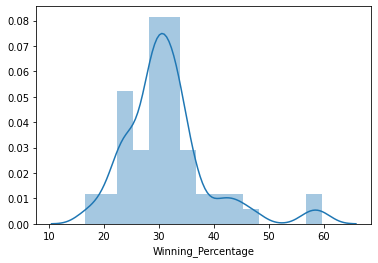

In [72]:
laliga['Winning_Percentage'] = (laliga['GamesWon'].astype('int64')/laliga['GamesPlayed'].astype('int64'))*100
sns.distplot(laliga['Winning_Percentage'])

In [80]:
test_stat,p_value = stats.shapiro(laliga['Winning_Percentage'])
print('p_value :',np.round(p_value,4))

p_value : 0.0001


#### Conclusion:

* `We can conclude by Shapiro Wilk Test that, Winning Percentage for Teams is not Normally Distributed`

(0.7095597982406616, 0.00470982538536191)


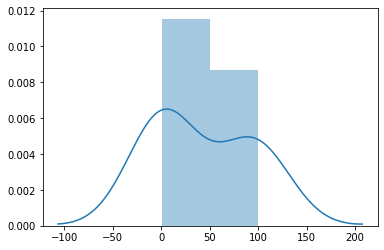

In [159]:
print(stats.shapiro([1,2,3,4,88,99,100]))
l1 = [1,2,3,4,88,99,100]
sns.distplot(l1)

* 4.	Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.


In [84]:
def Position_Label(x):
    if int(x)<=3:
        return 'Top'
    elif int(x)<=7:
        return 'Average'
    else:
        return 'Poor'

laliga['Position_Label'] = laliga['BestPosition'].apply(Position_Label)
laliga.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,...,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition,Winning_Percentage,Position_Label
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,...,8,8,3,4,79,1929,1929,1,59.630702,Top
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,...,12,12,4,6,83,1929,1929,1,57.241130,Top
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,...,16,9,7,6,56,1929,2003,1,47.475134,Top
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,...,10,11,10,7,50,1931,1988,1,44.557057,Top
5,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,...,10,5,8,10,49,1929,1929,1,43.772629,Top


In [100]:
# H0 : Winning Percentage of Top(1/2/3) Positions = Winning Percentage of Avg(4,5,6,7) Positions ||| No Difference
# H1 : H0 is False

Top_Win_Pct = laliga[laliga['Position_Label'] == 'Top'][['Winning_Percentage']]
Avg_Win_Pct = laliga[laliga['Position_Label'] == 'Average'][['Winning_Percentage']]

test_stat,p_value = stats.ttest_ind(Top_Win_Pct,Avg_Win_Pct)
print('P_Value :',np.round(p_value[0],5))

P_Value : 2e-05


#### Conclusion:
* `As (p_value)0.00002 < 0.05(5%), we Reject the Null Hypothesis, i.e.,`
* `There is a Significant Difference in Win_Percentage between teams who attained 1-3 Positions compared to teams who attained 4-7 Positions.`

-------------------

2. A study was done to measure the blood pressure of 60 year old women with glaucoma. A random sample of 200 60-year old women with glaucoma was chosen. The mean of the systolic blood pressure in the sample was 140 mm Hg and the standard deviation was 25 mm Hg.

In [113]:
n = 200
xbar = 140
sigma = 25

# Population SD is given so using Z-Test for Calculation of Intervals

a)	Calculate the estimated standard error of the sample mean? What does the standard error indicate?

In [114]:
# Standard Error
std_error = sigma/np.sqrt(n)
print('Standard Error :',std_error)

Standard Error : 1.7677669529663687


Standard Error Indications:
  * Standard Error is Low
  * Mean Blood Pressure of the Sample is almost accurate represenatation of the Mean lood Pressure of the Population

b)	Estimate a 95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma.

In [115]:
print('95% Confidence Interval :',stats.norm.interval(0.95,xbar,std_error))

95% Confidence Interval : (136.5352404391258, 143.4647595608742)


In [119]:
stats.norm.interval(0.95,xbar,std_error)[1] - stats.norm.interval(0.95,xbar,std_error)[0]

9.799819922700294

c)	Assume that instead of 200, a random sample of only 100 60-year old women with glaucoma was chosen. The sample mean and standard deviation estimates are the same as those in the original study. What is the estimated 95% confidence interval for the true mean blood pressure?

In [117]:
#updated Sample
n = 100
xbar = 140
sigma = 25

In [118]:
std_error = sigma/np.sqrt(n)

print('95% Confidence Interval for Updated Sample :',stats.norm.interval(0.95,xbar,std_error))

95% Confidence Interval for Updated Sample : (135.10009003864985, 144.89990996135015)


d)	Which of the two above intervals are wider?

    * First Sample's Confidence Interval  : (136.5352, 143.4647)  | Interval Length : 6.9295
    * Second Sample's Confidence Interval : (135.10009, 144.8999) | Interval Length : 9.7998

* `We can see that the Second Interval(Sample Size : 100) is Wider than the Interval for Sample of 200`

e)	Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.

* `As Sample Size Increases, we can see that we get more observations on Population thus a better Idea about the Population.`
* `So, We get a better (reduced) value for Standard Error.`

----------------

   3. Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased 
with the introduction of a cut-resistant, longer-lasting golf ball. 
Therefore, the research group at Par has been investigating a new golf ball coating designed to resist cuts and provide a more durable ball. The tests with the coating have been promising.

   One of the researchers voiced concern about the effect of the new coating on driving distances. 

   Par would like the new cut-resistant ball to offer driving distances comparable to those of the current-model golf ball. 
To compare the driving distances for the two balls, 40 balls of both the new and current models were subjected to distance tests. The testing was performed with a mechanical hitting machine so that any difference between the mean distances for the two models could be attributed to a difference in the design. 

   The results of the tests, with distances measured to the nearest yard, are contained in the data set “Golf”.


In [122]:
golf = pd.read_csv('Golf.csv')
golf

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262
5,283,251
6,258,262
7,266,289
8,259,286
9,270,264


* 1.	Formulate and present the rationale for a hypothesis test that Par could use to compare the driving distances of the current and new golf balls.


* `We are Given the Distance to which the balls were hit current & new coating models`
* `We need to compare the average distance achieved`

        * H0 : No Difference in Average driving distance | avg_driving_distance_present = avg_driving_distance_new
        * H1 : H0 is False | avg_driving_distance_new - avg_driving_distance_present > 0
    
* `Above Mentioned would be my Hypothesis, and this test would help Par to compare the distance and if Null Hypothesis is rejected, then the New Coating Design is effective.`

* 2.	Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?

In [128]:
test_stat,p_value = stats.ttest_rel(golf['Current'],golf['New'])

print('P_Value :',p_value)

P_Value : 0.20916361823147053


When considering on 95% confidence, we can see that p_value(0.2091) > alpha(0.05).
### `Recommendation : There is no Effect of the New Model on the Golf Balls, Par needs to perform more research and studies`

* 3.	What is the 95% confidence interval for the population mean of each model, and what is the 95% confidence interval for the difference between the means of the two population?

In [153]:
print('95% Confidence Interval for Current Model \t:',\
      stats.t.interval(0.95, len(golf.Current)-1, golf.Current.mean(), golf.Current.sem()))

print('\n95% Confidence Interval for New Model \t\t:',\
      stats.t.interval(0.95, len(golf.New)-1, golf.New.mean(), golf.New.sem()))


# Difference Calculation
golf['Difference'] = np.abs(golf['Current'] - golf['New'])

diff_confidence_interval = stats.t.interval(0.95, len(golf['Difference'])-1, golf['Difference'].mean(), golf['Difference'].sem())

print('\033[1m'+'\n95% Confidence Interval for Differences in Driving Distance between 2 Models :\n\n\t\t\t',diff_confidence_interval)


95% Confidence Interval for Current Model 	: (267.47565965314044, 273.0743403468595)

95% Confidence Interval for New Model 		: (264.33481641038986, 270.66518358961014)

95% Confidence Interval for Differences in Driving Distance between 2 Models :

			 (8.025753341581375, 13.624246658418624)
